<a href="https://colab.research.google.com/github/flash-berry/Data-Science-/blob/main/%D0%94%D0%973%D0%BF%D0%BEDS_%D0%98%D0%96%D0%A6%D0%9F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Домашняя работа №3**

Выполнил Пышный Артём Александрович

Доступ к датасету: https://www.kaggle.com/datasets/mirichoi0218/insurance?resource=download

In [ ]:
import numpy as np
import matplotlib as plt
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Датасет состоит из следующих признаков:**

1) Age - возраст страхователя.

2) Sex - пол страхователя.

3) BMI - индекс массы тела, дающий представление о фигуре, относительно высоком или низком весе по отношению к росту, объективный показатель массы тела (кг/м2), использующий соотношение роста и веса, в идеале 18,5 до 24,9.

4) Children - количество детей, на которых распространяется медицинская страховка/количество иждивенцев.

5) Smoker - курение.

6) Region - район проживания страхователя в США: северо-восток, юго-восток, юго-запад, северо-запад.

7) Charges - индивидуальные медицинские расходы, оплачиваемы медицинской страховкой.

**Для описанного датасета предлагается построить модель линейной регрессии, где Charges - целевая переменная, а остальные переменные предикаторы.**

# 1) Постройте, пожалуйста, линейную регрессию, в которой ключевой переменной является размер страховых выплат, а остальные переменные набора данных — предикторами (регрессанд лучше прологарифмировать).

In [ ]:
df = pd.read_csv("/content/insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Посмотрим на распределение целевого признака

<Axes: xlabel='charges', ylabel='Density'>

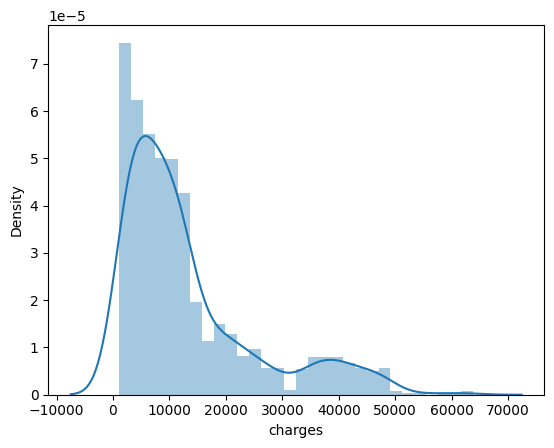

In [ ]:
sns.distplot(df['charges'])

Распределение целевой переменной имеет тяжёлый правый хвост, поэтому применим функцию логарифмирования, чтобы привести распределение к более нормальному

<Axes: xlabel='charges', ylabel='Density'>

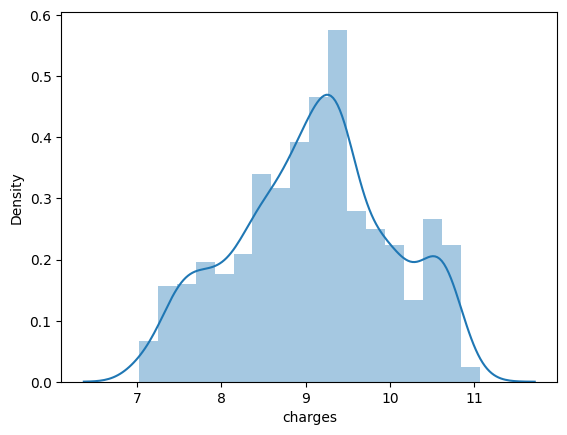

In [ ]:
sns.distplot(np.log(df['charges']))

Разделим выборку на тестовую и тренировочную

Преобразуем данные: применим стандартизацию к численным предикаторам, one-hot encoding к категориальным предикаторам и функцию логарифмирования к целевой переменной

In [ ]:
from sklearn.model_selection import train_test_split

y = df['charges']
X = df.drop(columns=['charges'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import StandardScaler, OneHotEncoder

num_selector = make_column_selector(dtype_include=['int64', 'float64'])
cat_selector = make_column_selector(dtype_include=['object', 'category'])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_selector),
        ('cat', OneHotEncoder(drop='first'), cat_selector)
    ])

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

y_log_train = np.log(y_train)
y_log_test = np.log(y_test)

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_processed, y_log_train)

LinearRegression()

# 2) Представьте интерпретацию коэффициентов регресии в форме «если значение предиктора изменяется на 1, то значение ключевого признака изменяется на ... ».

In [ ]:
coefficients = pd.DataFrame({'Коэффициент': model.coef_})
coefficients

,Коэффициент
0,0.487112
1,0.083162
2,0.115311
3,-0.078777
4,1.552596
5,-0.064799
6,-0.159153
7,-0.123438


# 3) Представьте описание качества подгонки регрессии, основанное на коэффициенте детерминации и F–статистике.

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

y_pred_train = np.exp(model.predict(X_train_processed))
y_pred_test = np.exp(model.predict(X_test_processed))

train_mse = mean_squared_error(y_train, y_pred_train)
train_r2 = r2_score(y_train, y_pred_train)
train_mae = mean_absolute_error(y_train, y_pred_train)

test_mse = mean_squared_error(y_test, y_pred_test)
test_r2 = r2_score(y_test, y_pred_test)
test_mae = mean_absolute_error(y_test, y_pred_test)

print(f"Train MSE: {train_mse:.4f}")
print(f"Train R2: {train_r2:.4f}")
print(f"Train MAE: {train_mae:.4f}")
print('-------------------------')
print(f"Test MSE: {test_mse:.4f}")
print(f"Test R2: {test_r2:.4f}")
print(f"Test MAE: {test_mae:.4f}")

Train MSE: 74146447.7599
Train R2: 0.4938
Train MAE: 4374.6670
-------------------------
Test MSE: 57859071.0754
Test R2: 0.6054
Test MAE: 3813.2147
